<a href="https://colab.research.google.com/github/AchyDaMan/FinalProject_TelcoChurn/blob/main/FinalProject_TelcoChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt

Markdown Markdown

In [3]:
#Load everything into a df

df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
#Calculating Percent Turnover
yes = 0
no = 0

for i in df['Churn'].iteritems():
  #print(i[1])
  if 'Yes' in i[1]:
    yes += 1
  elif 'No' in i[1]:
    no += 1

print('They stayed:', no)
print('They left:', yes)
print('Percent turnover:', yes/(no+yes))

They stayed: 5174
They left: 1869
Percent turnover: 0.2653698707936959


In [19]:
#We will calculate how churn relates to contract type (month --> month, yearly)

monthlyChurn = 0
yearlyChurn = 0
monthlyKeep = 0
yearlyKeep = 0
rows = []
for i in df['Contract'].iteritems():
  if 'Month' in i[1]:
    #print(0)
    rows.append(0)
  elif 'year' in i[1]:
    #print(1)
    rows.append(1)
iter = 0
for i in df['Churn'].iteritems():
  #print(i[1])
  if 'Yes' in i[1]:
    if rows[iter] == 0:
      monthlyChurn += 1
    elif rows[iter] == 1:
      yearlyChurn += 1
  elif 'No' in i[1]:
    if rows[iter] == 0:
      monthlyKeep += 1
    elif rows[iter] == 1:
      yearlyKeep += 1 
  iter += 1   

print(monthlyChurn, yearlyChurn, monthlyKeep, yearlyKeep)

1655 214 2220 2954


In [52]:
#We will calculate the relation between seniority and tenure (in months)

#print(df['SeniorCitizen'])
seniorList = list(df['SeniorCitizen'])
iter = 0
tenureList = list(df['tenure'])
avgTenure = mean(tenureList)
print(round(avgTenure,2))

seniorTenure = []
notThat = []
iter = 0
for i in seniorList:
  if(i == 0):
    notThat.append(tenureList[iter])
  elif(i == 1):
    seniorTenure.append(tenureList[iter])
  iter += 1

notMean = mean(notThat)
seniorMean = mean(seniorTenure)

32.37


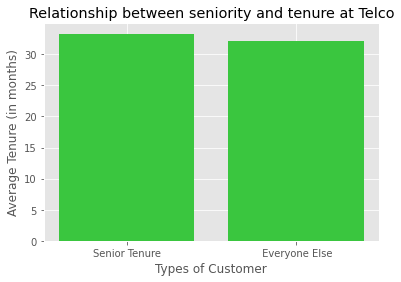

In [54]:
#Plot the senior/tenure relationship
plt.style.use('ggplot')
x = ['Senior Tenure' ,' Everyone Else']
y = [seniorMean, notMean]
x_pos = np.arange(len(x))
plt.bar(x_pos, y, color='#3ac63f')
plt.xlabel("Types of Customer")
plt.ylabel("Average Tenure (in months)")
plt.title("Relationship between seniority and tenure at Telco")
plt.xticks(x_pos, x)
plt.show()

In [ ]:
#Calculations
percentChurnPerMonth = monthlyChurn / (monthlyChurn + monthlyKeep)
print(percentChurnPerMonth)



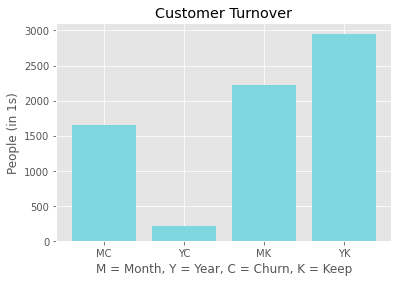

In [27]:
#Bar Graph Time!

plt.style.use('ggplot')
x = ['MC', 'YC', 'MK', 'YK']
y = [monthlyChurn, yearlyChurn, monthlyKeep, yearlyKeep]
x_pos = np.arange(len(x))
plt.bar(x_pos, y, color='#7ed6df')
plt.xlabel("M = Month, Y = Year, C = Churn, K = Keep")
plt.ylabel("People (in 1s)")
plt.title("Customer Turnover")
plt.xticks(x_pos, x)
plt.show()

